<a href="https://colab.research.google.com/github/saumyadash9/Play-Store-App-Review-Analysis-Capstone-Project/blob/main/Saumya_Dash_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Loading Dataset


In [515]:
#Importing required packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [516]:
#Importing and Mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [517]:
#Reading the csv files using pd.read_csv
df = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

Exploring Dataset


In [518]:
#Finding info about null and non non values of the dataset using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [519]:
#to take an overview of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [520]:
#observing the dataframe
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [521]:
#observing the dataframe
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [522]:
#Calculating the null values in each column
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [523]:
#Calculating the null values in each column
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [524]:
#looking at the unique values of each columns one by one to get an overview of the column values of the dataset 
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [525]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [526]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [527]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [528]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Data Wrangling

In [529]:
df['Rating'].mean()

4.193338315362443

In [530]:
# #Dealing with Rating Column
# #1. Substituting the Null values and ratings greater than 5 with 0
df['Rating'] = df['Rating'].fillna(0)
df['Rating'] = df['Rating'].replace(19.,0,regex = True)

In [531]:
#2.Dealing with reviews column
df['Reviews'] = pd.to_numeric(df['Reviews'],errors ='coerce')
df['Reviews'] = df['Reviews'] .replace(np.nan,0,regex = True)
df['Reviews'] = df['Reviews'].astype(int)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [533]:
#creating a temprorary dataframe to find the value_counts
tem_df = df['Price'].value_counts().reset_index()
tem_df[tem_df["index"] =="Everyone"]


,index,Price
60,Everyone,1


In [534]:
#dealing with price column

df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].replace('Everyone',0,regex = True)
df['Price'] = df['Price'].astype(float)

In [535]:
#Install
df.Installs = df.Installs.apply(lambda x:x.replace('+',' '))
df['Price'] = df['Price'].astype(float)

In [536]:
# df.Installs = df.Installs.apply(lambda x:x.replace('+',' '))
# df['Installs'] = df['Installs'].replace('Free',"0",regex = True)
# df['Installs'] = df['Installs'].astype(float)

In [537]:
df.Installs = df.Installs.apply(lambda x:x.replace('+',''))
df['Installs'] = df['Installs'].replace('Free',"0",regex = True)
df['Installs'] = df['Installs'].replace(',','',regex = True)
df['Installs'] = df['Installs'].astype(float)

In [538]:
#= (pd.to_numeric(df['Installs'].str.replace(',',''), errors='coerce'))

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [541]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [542]:
#Handling Size column
def replace_M_k(x):
  if "M" in x:
    return x.replace("M","000")
  elif "k" in x :
    return x.replace("k"," ")
  else:
    return 0
df['Size'] = df['Size'].apply(replace_M_k)
df['Size'] = df['Size'].astype(float)


In [543]:
size_list = []
for i in df.Size:
  if i< 20.0:
    size_list.append(i*1000000)
  else:
    size_list.append(i)
df["Size"] = pd.DataFrame(size_list)

In [544]:
df.Size.unique()

array([1.90e+04, 1.40e+04, 8.70e+06, 2.50e+04, 2.80e+06, 5.60e+06,
       2.90e+04, 3.30e+04, 3.10e+06, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+06, 5.50e+06, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+06, 7.00e+06, 2.30e+04, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+04, 2.40e+04, 0.00e+00,
       9.40e+06, 1.50e+04, 1.00e+04, 1.20e+06, 2.60e+04, 8.00e+06,
       7.90e+06, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+04, 2.50e+06,
       1.60e+04, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+04,
       3.20e+04, 5.40e+06, 1.80e+04, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+04, 9.00e+06, 6.70e+06, 3.00e+04, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+04, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+04, 7.30e+04, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+04, 7.30e+06, 9.10e+06, 5.50e

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [546]:
#dealing with Null values in Content Rating by dropping rows using index values
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,0.0,0,0.0,0.0,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [547]:
df= df.drop(10472)

In [548]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [549]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,0.0,0,0.0,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [550]:
df= df.drop(9148)

In [551]:
df['Current Ver'] = df['Current Ver'].replace(np.nan,"Varies with device")
df.isnull().sum().sort_values(ascending=False)

Android Ver       2
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
dtype: int64

In [552]:
relevent_df = df.groupby('Android Ver').App.count().sort_values(ascending = False).reset_index()
relevent_df
df['Android Ver'] = df['Android Ver'].replace(np.nan,"4.1 and up")

In [553]:
df.isnull().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [554]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [555]:
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [556]:
df1.isnull().sum().sort_values(ascending=False)

Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
App                           0
dtype: int64

In [557]:
df1 = df1.dropna()

In [558]:
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [559]:
df1.isnull().sum().sort_values(ascending=False)

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Data Visualization


In [560]:
# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [561]:
df_category_value_counts = df.groupby('Category').App.count().sort_values(ascending = False).reset_index()
df_category_value_counts.rename(columns = {'Category':'app_category','App': 'Number_of_apps'}, inplace = True)
df_category_value_counts

,app_category,Number_of_apps
0,FAMILY,1971
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


In [562]:
df_category_installs= df.groupby('Category')["Installs"].mean().sort_values(ascending=False).reset_index()
df_category_installs.rename(columns = {'Category': 'app_category'}, inplace = True)
df_category_installs

,app_category,Installs
0,COMMUNICATION,8.435989e+07
1,SOCIAL,4.769447e+07
2,VIDEO_PLAYERS,3.555430e+07
3,PRODUCTIVITY,3.343418e+07
4,GAME,3.066960e+07
5,PHOTOGRAPHY,3.011417e+07
6,TRAVEL_AND_LOCAL,2.662359e+07
7,NEWS_AND_MAGAZINES,2.648876e+07
8,ENTERTAINMENT,1.925611e+07
9,TOOLS,1.358573e+07


Text(0, 0.5, 'Number of apps')

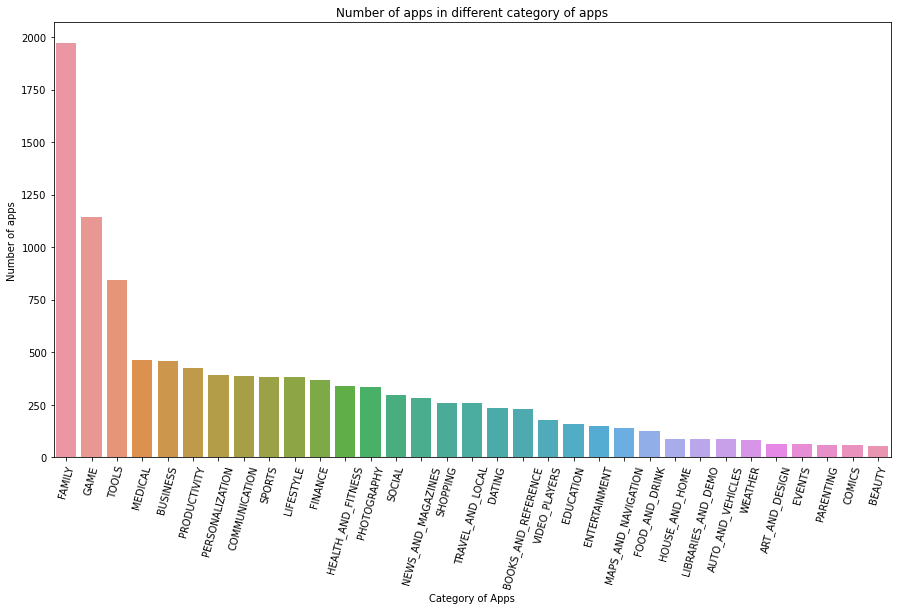

In [563]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_value_counts , x='app_category', y='Number_of_apps')
plt.xticks(rotation=75)
plt.title('Number of apps in different category of apps')
plt.xlabel('Category of Apps')
plt.ylabel('Number of apps')

Text(0, 0.5, 'Number of installs')

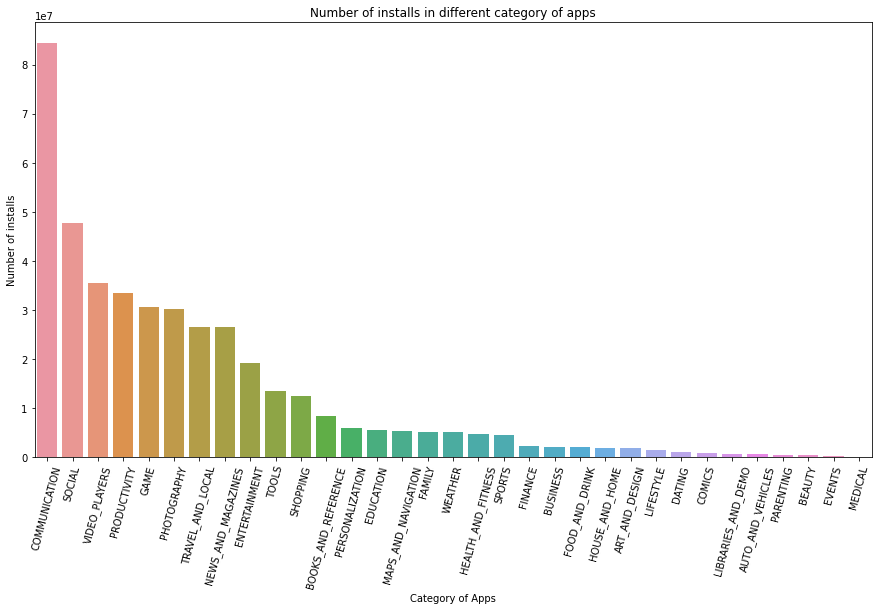

In [564]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_category_installs , x='app_category', y='Installs')
plt.xticks(rotation=75)
plt.title('Number of installs in different category of apps')
plt.xlabel('Category of Apps')
plt.ylabel('Number of installs')

In [565]:
pd.merge(df_category_value_counts, df_category_installs, on='app_category')

,app_category,Number_of_apps,Installs
0,FAMILY,1971,5.204598e+06
1,GAME,1144,3.066960e+07
2,TOOLS,843,1.358573e+07
3,MEDICAL,463,1.150269e+05
4,BUSINESS,460,2.178076e+06
5,PRODUCTIVITY,424,3.343418e+07
6,PERSONALIZATION,392,5.932385e+06
7,COMMUNICATION,387,8.435989e+07
8,SPORTS,384,4.560350e+06
9,LIFESTYLE,382,1.407444e+06


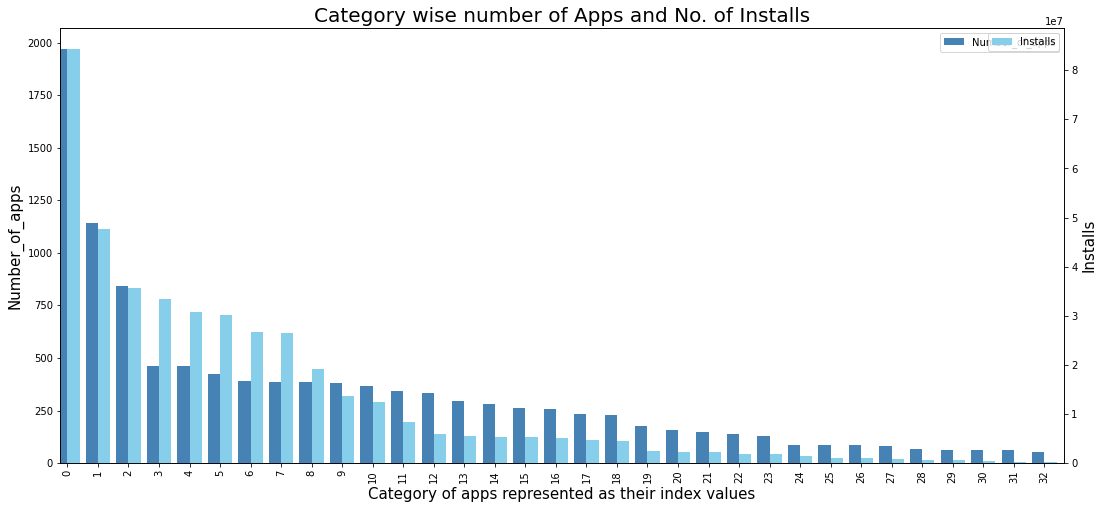

In [566]:
fig = plt.figure(figsize =(18,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df_category_value_counts.plot(kind='bar', color='steelblue', ax=ax, width=width, position=1)
df_category_installs.plot(kind='bar', color='skyblue', ax=ax2, width=width, position=0)
ax.set_xlabel('Category of apps represented as their index values',fontsize =(15))
ax.set_ylabel('Number_of_apps',fontsize = (15))
ax2.set_ylabel('Installs',fontsize = (15))
plt.title('Category wise number of Apps and No. of Installs',fontsize = (20))
plt.show()

In [567]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [568]:
df1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [569]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,1.083900e+04,1.083900e+04,10839.000000
mean,3.622105,4.441939e+05,1.662066e+06,1.546577e+07,1.027463
std,1.514233,2.927893e+06,2.717040e+06,8.503315e+07,15.950436
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,1.300000e+04,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,3.600000e+04,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,2.900000e+06,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.800000e+07,1.000000e+09,400.000000


In [570]:
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.078589,-0.096388,0.084611,-0.016365
Reviews,0.078589,1.000000,-0.083745,0.643121,-0.009668
Size,-0.096388,-0.083745,1.000000,-0.099416,0.015320
Installs,0.084611,0.643121,-0.099416,1.000000,-0.011691
Price,-0.016365,-0.009668,0.015320,-0.011691,1.000000


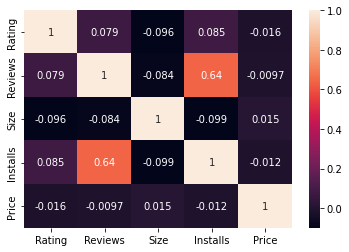

<Figure size 1080x576 with 0 Axes>

In [571]:
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(15, 8))
plt.show()

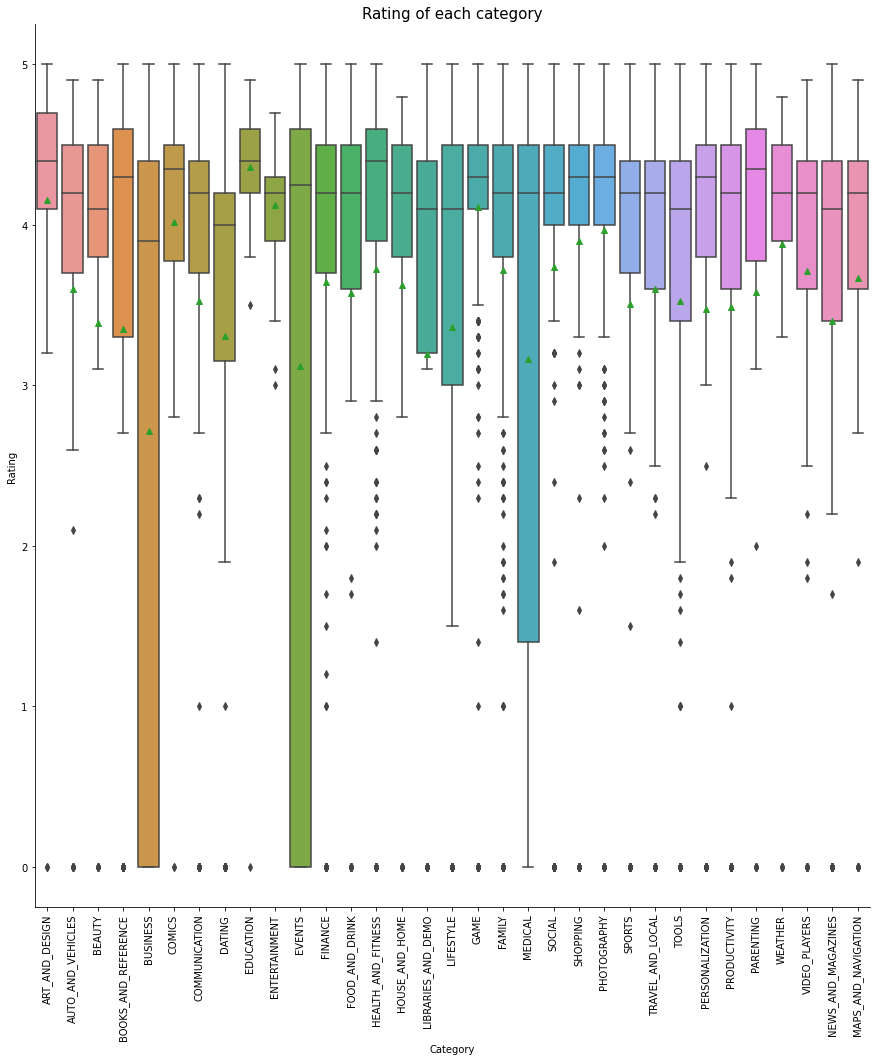

In [593]:
sns.catplot(x='Category',y='Rating',data=df,kind='box',height=13,showmeans = True)
sns.color_palette("viridis", as_cmap=True)
plt.title("Rating of each category", size=15)
plt.xticks(rotation=90)
plt.show()

In [573]:
# using groupby operation to get the sentiment of users per app
relevent_df1 = df1.groupby(['App','Sentiment'])['Translated_Review'].count().unstack()


In [574]:
# grabing app and category column from the first data set
relevent_df2 =  df[['App','Category']]

In [575]:
# lets do left doin on app for above two dataset
relevent_df3 = pd.merge(relevent_df1, relevent_df2, left_on='App',right_on='App', how='left')
# doing aggrigate groupby operation 
catagory_vs_reviews = relevent_df3.groupby('Category').agg({'Positive': 'sum', 'Neutral': 'sum' ,'Negative': 'sum'})
catagory_vs_reviews 

,Positive,Neutral,Negative
Category,,,
ART_AND_DESIGN,259.0,62.0,61.0
AUTO_AND_VEHICLES,236.0,36.0,17.0
BEAUTY,185.0,88.0,65.0
BOOKS_AND_REFERENCE,551.0,130.0,134.0
BUSINESS,1450.0,555.0,342.0
COMICS,72.0,6.0,2.0
COMMUNICATION,1292.0,285.0,372.0
DATING,1971.0,530.0,697.0
EDUCATION,1346.0,132.0,216.0


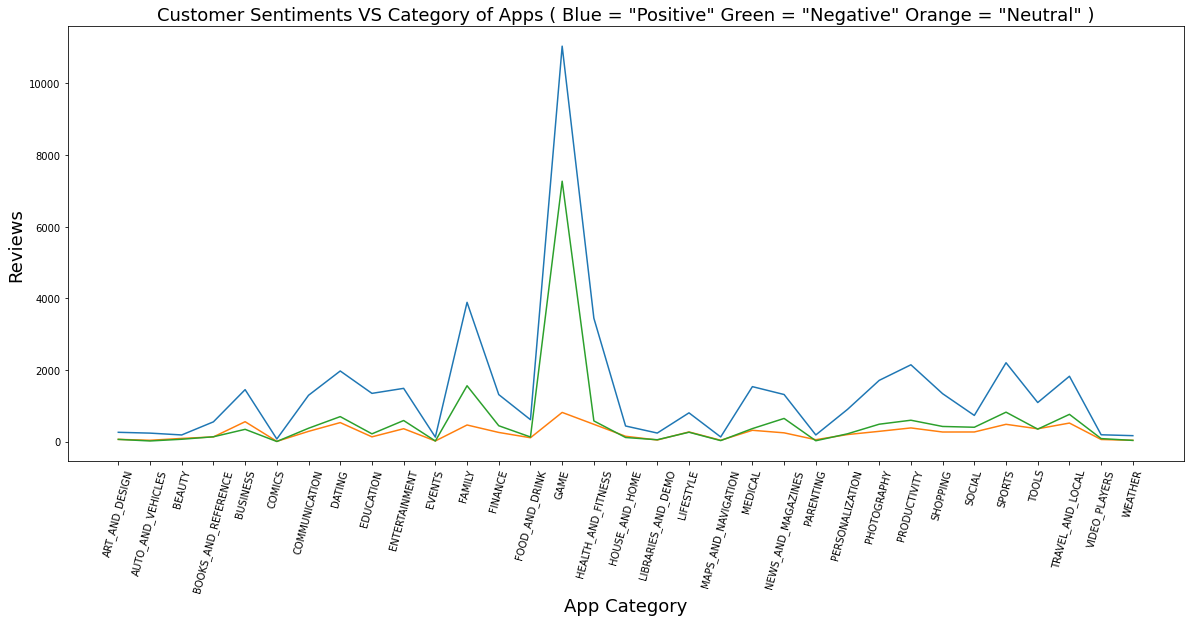

In [594]:
# lets plot the above data frame to visualize the trend

plt.plot(catagory_vs_reviews)
plt.title('Customer Sentiments VS Category of Apps ( Blue = "Positive" Green = "Negative" Orange = "Neutral" )' , fontsize = 18)
plt.ylabel('Reviews',fontsize = 18)
plt.xlabel('App Category',fontsize = 18)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)

In [577]:
# doing groupby operation catagory wise and counting the number of apps per ratings
catagory_vs_content_rating = df.groupby(['Category','Content Rating']).App.count().unstack()
catagory_vs_content_rating = catagory_vs_content_rating.replace(np.nan,0,regex = True) #replacing null values with zero
catagory_vs_content_rating

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0.0,61.0,1.0,0.0,3.0,0.0
AUTO_AND_VEHICLES,0.0,83.0,1.0,0.0,1.0,0.0
BEAUTY,0.0,45.0,2.0,3.0,3.0,0.0
BOOKS_AND_REFERENCE,0.0,202.0,5.0,3.0,21.0,0.0
BUSINESS,0.0,445.0,1.0,1.0,13.0,0.0
COMICS,2.0,26.0,3.0,7.0,22.0,0.0
COMMUNICATION,0.0,345.0,0.0,10.0,32.0,0.0
DATING,0.0,21.0,0.0,201.0,12.0,0.0
EDUCATION,0.0,144.0,8.0,3.0,1.0,0.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

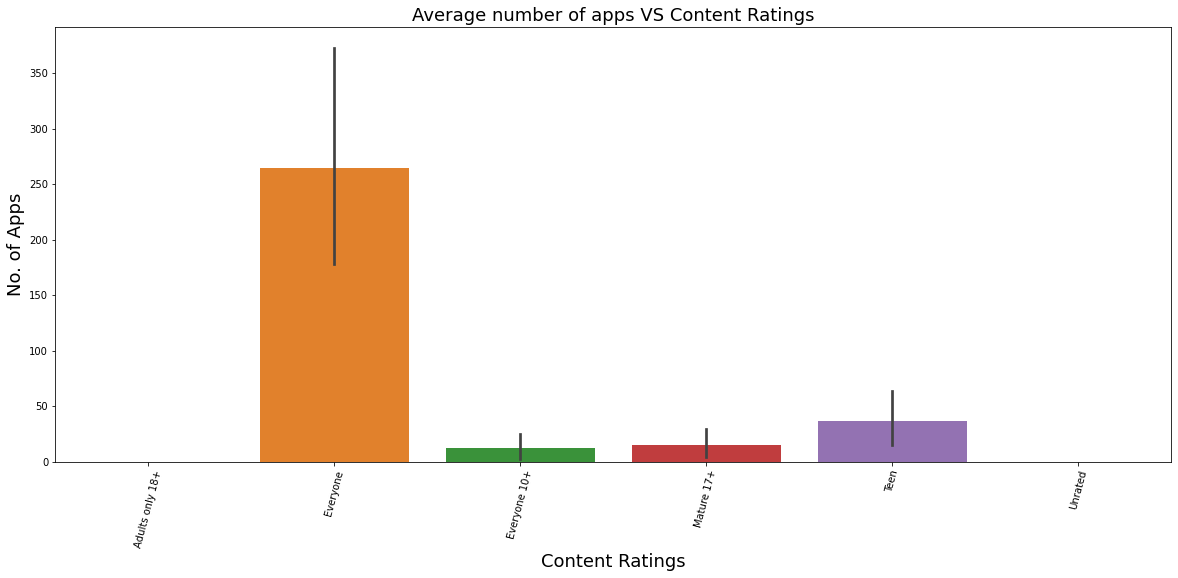

In [578]:
# Plotting Average number of apps VS Content Ratings

sns.barplot(data = catagory_vs_content_rating)
plt.title('Average number of apps VS Content Ratings', fontsize = 18)
plt.ylabel('No. of Apps',fontsize = 18)
plt.xlabel('Content Ratings',fontsize = 18)
plt.xticks(rotation=75)
# plt.rcParams['figure.figsize'] = (15,8)

In [579]:
# doing groupby operation catagory wise and counting the number of apps per ratings

catagory_vs_content_rating_istalls = df.groupby(['Category','Content Rating']).Installs.mean().unstack()
catagory_vs_content_rating_istalls = catagory_vs_content_rating_istalls.replace(np.nan,0,regex = True)
catagory_vs_content_rating_istalls

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0.0,1.046362e+06,5.000000e+05,0.000000e+00,2.000333e+07,0.0
AUTO_AND_VEHICLES,0.0,5.075929e+05,1.000000e+06,0.000000e+00,1.000000e+07,0.0
BEAUTY,0.0,5.937122e+05,5.500000e+04,4.000000e+04,8.333333e+04,0.0
BOOKS_AND_REFERENCE,0.0,1.194275e+06,4.222000e+06,1.833667e+06,7.874357e+07,0.0
BUSINESS,0.0,2.251263e+06,1.000000e+02,5.000000e+00,7.917692e+03,0.0
COMICS,500000.0,4.798500e+05,1.700167e+05,3.300000e+05,1.808636e+06,0.0
COMMUNICATION,0.0,8.734072e+07,0.000000e+00,3.801100e+07,6.670677e+07,0.0
DATING,0.0,9.656648e+04,0.000000e+00,1.294786e+06,1.692425e+05,0.0
EDUCATION,0.0,5.600014e+06,7.750000e+06,6.833333e+05,1.000000e+06,0.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

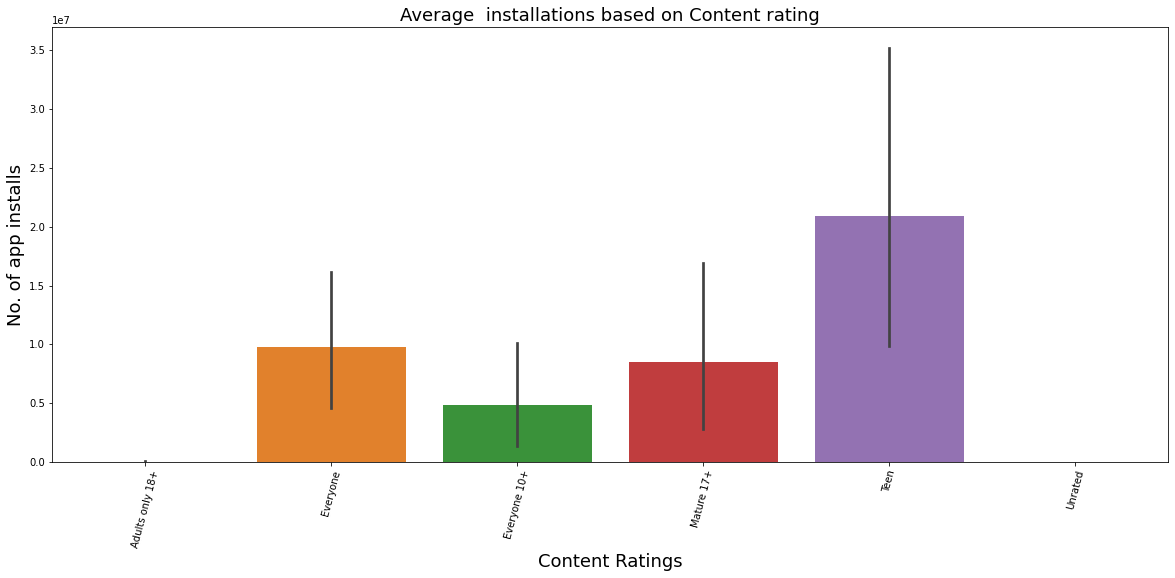

In [580]:
# catagory_vs_content_rating_istalls.plot(kind= 'bar')
# plt.plot(catagory_vs_content_rating_istalls)
sns.barplot(data = catagory_vs_content_rating_istalls)   #, x ='Content Rating', y='Category', linewidth=2)
plt.title('Average  installations based on Content rating', fontsize = 18)
plt.ylabel('No. of app installs',fontsize = 18)
plt.xlabel('Content Ratings',fontsize = 18)
plt.xticks(rotation=75)
# plt.rcParams['figure.figsize'] = (20,8)

In [581]:
relevent_df =df[['App','Category','Installs']]
relevent_df.sort_values(by=['Installs'],ascending = False).head(10)

,App,Category,Installs
3665,YouTube,VIDEO_PLAYERS,1.000000e+09
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,1.000000e+09
3896,Subway Surfers,GAME,1.000000e+09
3996,Google Chrome: Fast & Secure,COMMUNICATION,1.000000e+09
3909,Instagram,SOCIAL,1.000000e+09
865,Google Play Games,ENTERTAINMENT,1.000000e+09
464,Hangouts,COMMUNICATION,1.000000e+09
1917,Subway Surfers,GAME,1.000000e+09
1700,Subway Surfers,GAME,1.000000e+09
3565,Google Drive,PRODUCTIVITY,1.000000e+09


In [582]:
relevent_df = relevent_df.drop(1917)
relevent_df =relevent_df.drop(1700)
best_apps_df =relevent_df.sort_values(by=['Installs'],ascending = False).head(10)
best_apps_df

,App,Category,Installs
2808,Google Photos,PHOTOGRAPHY,1.000000e+09
1750,Subway Surfers,GAME,1.000000e+09
3234,Google,TOOLS,1.000000e+09
4234,Skype - free IM & video calls,COMMUNICATION,1.000000e+09
3687,Google Play Movies & TV,VIDEO_PLAYERS,1.000000e+09
4170,Google Drive,PRODUCTIVITY,1.000000e+09
4153,Hangouts,COMMUNICATION,1.000000e+09
865,Google Play Games,ENTERTAINMENT,1.000000e+09
4150,Google,TOOLS,1.000000e+09
4144,Google+,SOCIAL,1.000000e+09


In [583]:
category_vs_type_df =df.groupby(['Category','Type'])['App'].count().unstack()

In [584]:
category_vs_type_df = category_vs_type_df.replace(np.nan,0,regex=True)
category_vs_type_df

Type,Free,Paid
Category,,
ART_AND_DESIGN,62.0,3.0
AUTO_AND_VEHICLES,82.0,3.0
BEAUTY,53.0,0.0
BOOKS_AND_REFERENCE,203.0,28.0
BUSINESS,446.0,14.0
COMICS,60.0,0.0
COMMUNICATION,360.0,27.0
DATING,227.0,7.0
EDUCATION,152.0,4.0


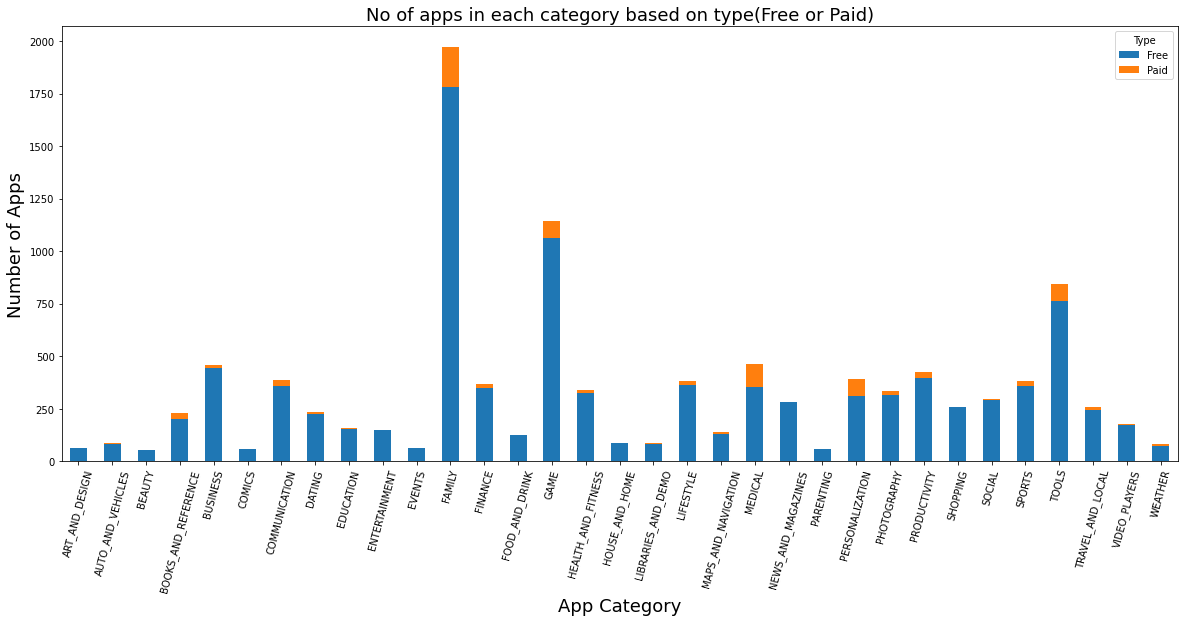

In [585]:
category_vs_type_df.plot(kind= 'bar', stacked = True)
# plt.plot(category_vs_type_df)
plt.title('No of apps in each category based on type(Free or Paid)', fontsize = 18)
plt.ylabel('Number of Apps',fontsize = 18)
plt.xlabel('App Category',fontsize = 18)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)

In [586]:
relevent_df = df[['App','Size']]
relevent_df

,App,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,19000.0
1,Coloring book moana,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8700000.0
3,Sketch - Draw & Paint,25000.0
4,Pixel Draw - Number Art Coloring Book,2800000.0
...,...,...
10836,Sya9a Maroc - FR,53000.0
10837,Fr. Mike Schmitz Audio Teachings,3600000.0
10838,Parkinson Exercices FR,9500000.0
10839,The SCP Foundation DB fr nn5n,0.0


In [587]:
relevent_df.describe()

,Size
count,1.083900e+04
mean,1.662066e+06
std,2.717040e+06
min,0.000000e+00
25%,1.300000e+04
50%,3.600000e+04
75%,2.900000e+06
max,1.800000e+07


In [588]:
#Lets check the best apps in medical catagory

In [589]:
a=df[(df.Category == 'MEDICAL')&(df.Type == 'Free')][['App']].head(10)
b=df[(df.Category == 'MEDICAL')&(df.Type == 'Paid')][['App']].head(10)


In [590]:
a

,App
2303,GoodRx Drug Prices and Coupons
2304,MyChart
2305,FollowMyHealth®
2306,CareZone
2307,Ovia Pregnancy Tracker & Baby Countdown Calendar
2308,Teladoc Member
2309,myAir™ for Air10™ by ResMed
2310,Blood Pressure
2311,Pregnancy Week By Week
2312,Doctor On Demand


In [591]:
b

,App
2243,Monash Uni Low FODMAP Diet
2244,iBP Blood Pressure
2245,Pedi STAT
2246,ASCCP Mobile
2247,Journal Club: Medicine
2248,Paramedic Protocol Provider
2249,MommyMeds
2250,Medical ID - In Case of Emergency (ICE)
2251,Human Anatomy Atlas 2018: Complete 3D Human Body
2252,Essential Anatomy 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25adafcb90>,
      dtype=object)

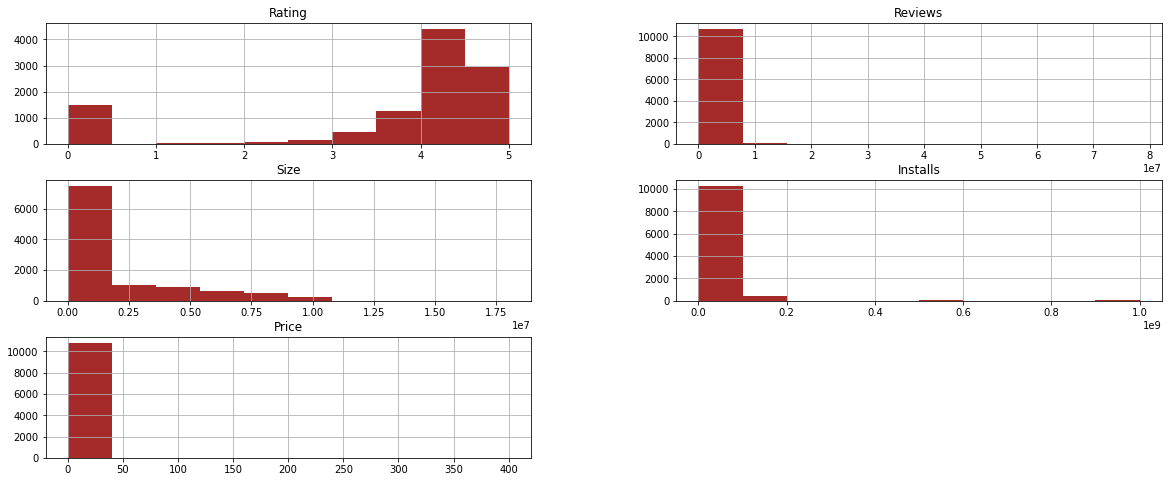

In [592]:
df.hist(color = 'brown')